### PCA from scratch

#### red wine dataset

In [ ]:
import pandas as pd

In [25]:
df = pd.read_csv("C:/Users/Drishya/Downloads/winequality-red.csv",sep = ';')

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [27]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [29]:
X_std

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [30]:
X_covariance_matrix = np.cov(X_std.T)

In [31]:
X_covariance_matrix

array([[ 1.00062578, -0.25629118,  0.67212377,  0.11484855,  0.09376383,
        -0.15389043, -0.11325227,  0.66846534, -0.68340559,  0.18312019,
        -0.06170686],
       [-0.25629118,  1.00062578, -0.55284143,  0.00191908,  0.06133613,
        -0.0105104 ,  0.07651786,  0.02204002,  0.23508431, -0.26115001,
        -0.20241462],
       [ 0.67212377, -0.55284143,  1.00062578,  0.14366701,  0.20395046,
        -0.06101629,  0.03555526,  0.36517555, -0.54224326,  0.31296577,
         0.10997202],
       [ 0.11484855,  0.00191908,  0.14366701,  1.00062578,  0.05564433,
         0.18716605,  0.20315493,  0.3555057 , -0.08570602,  0.00553058,
         0.04210177],
       [ 0.09376383,  0.06133613,  0.20395046,  0.05564433,  1.00062578,
         0.00556563,  0.04743013,  0.20075788, -0.26519198,  0.37149281,
        -0.22127893],
       [-0.15389043, -0.0105104 , -0.06101629,  0.18716605,  0.00556563,
         1.00062578,  0.66808426, -0.02195956,  0.07042154,  0.0516899 ,
        -0.069

In [32]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366 -0.63969145
  -0.24952314  0.19402091 -0.17759545 -0.35022736  0.10147858]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452 -0.0023886
   0.36592473 -0.1291103  -0.07877531 -0.5337351   0.41144893]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.0709103
   0.62167708 -0.38144967 -0.37751558  0.10549701  0.06959338]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429 -0.18402996
   0.09287208  0.00752295  0.29984469  0.29066341  0.04915555]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009  -0.05306532
  -0.21767112  0.11133867 -0.35700936  0.37041337  0.30433857]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198  0.05142086
   0.24848326  0.63540522 -0.2047805  -0.11659611 -0.01400021]
 [ 0.02357485  0.56948696  0.3224145  -0.03457712 -0.22246456 -0.0687016
  -0.37075027 -0.59211589  0.01903597 -0.09366237  0.13630755]
 [ 0.39535301  0.23357549 -0.3

In [62]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.1010718226728238
1.9271148896585166
1.551513791333421
1.2139917499341328
0.9598923792754814
0.6600210359988642
0.5841565453623774
0.42322137844375
0.34485778773040704
0.18144664164085167
0.05959558245500661


In [36]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [28.17393127881728, 17.50826990547677, 14.095849897952165, 11.02938664162115, 8.720837012236165, 5.996438771540081, 5.307192901751543, 3.8450609059816503, 3.133110152897779, 1.6484833324355046, 0.5414391992899001]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 28.17393128  45.68220118  59.77805108  70.80743772  79.52827474
  85.52471351  90.83190641  94.67696732  97.81007747  99.4585608
 100.        ]


In [41]:
print ("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1),
                      eig_pairs[1][1].reshape(11,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(3.1010718226728238, array([ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
       -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
       -0.11323206])), (1.9271148896585166, array([-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
        0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
       -0.38618096])), (1.551513791333421, array([-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
        0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
        0.47167322])), (1.2139917499341328, array([-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
       -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
       -0.12218109])), (0.9598923792754814, array([-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
       -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
        0.35068141])), (0.660021035998864

In [43]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[-1.61952988  0.45095009]
 [-0.79916993  1.85655306]
 [-0.74847909  0.88203886]
 [ 2.35767263 -0.26997601]
 [-1.61952988  0.45095009]]


In [53]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(Y , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, df[['quality']]], axis = 1)
principal_df = principal_df.rename(columns = {'quality': 'y'}, inplace = False)

print(principal_df)

           PC1       PC2  y
0    -1.619530  0.450950  5
1    -0.799170  1.856553  5
2    -0.748479  0.882039  5
3     2.357673 -0.269976  6
4    -1.619530  0.450950  5
...        ...       ... ..
1594 -2.150500  0.814286  5
1595 -2.214496  0.893101  6
1596 -1.456129  0.311746  6
1597 -2.270518  0.979791  5
1598 -0.426975 -0.536690  6

[1599 rows x 3 columns]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

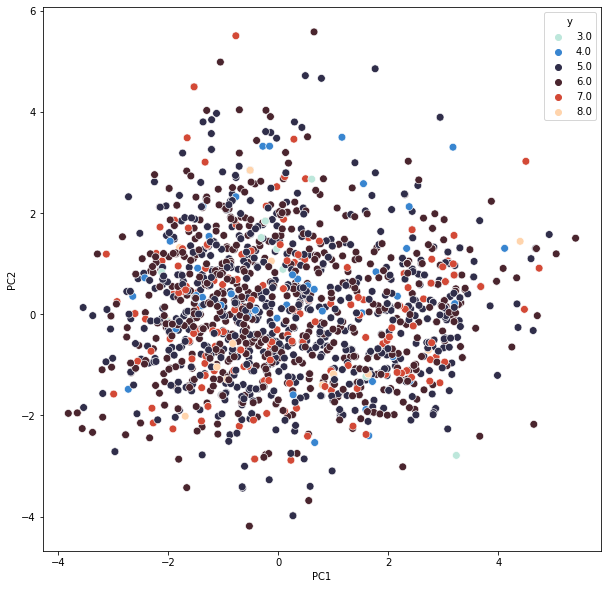

In [157]:
import seaborn as sb
import matplotlib.pyplot as plt
target = df['quality'] 
plt.figure(figsize = (10,10))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'y' , s = 60 , palette= 'icefire')

In [69]:
print ("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1),
                      eig_pairs[1][1].reshape(11,1),
                      eig_pairs[2][1].reshape(11,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(3.1010718226728238, array([ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
       -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
       -0.11323206])), (1.9271148896585166, array([-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
        0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
       -0.38618096])), (1.551513791333421, array([-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
        0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
        0.47167322])), (1.2139917499341328, array([-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
       -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
       -0.12218109])), (0.9598923792754814, array([-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
       -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
        0.35068141])), (0.660021035998864

In [70]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[-1.61952988  0.45095009 -1.77445415]
 [-0.79916993  1.85655306 -0.91169017]
 [-0.74847909  0.88203886 -1.17139423]
 [ 2.35767263 -0.26997601  0.2434887 ]
 [-1.61952988  0.45095009 -1.77445415]]


In [71]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(Y , columns = ['PC1','PC2','PC3'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, df[['quality']]], axis = 1)
principal_df = principal_df.rename(columns = {'quality': 'y'}, inplace = False)

print(principal_df)

           PC1       PC2       PC3  y
0    -1.619530  0.450950 -1.774454  5
1    -0.799170  1.856553 -0.911690  5
2    -0.748479  0.882039 -1.171394  5
3     2.357673 -0.269976  0.243489  6
4    -1.619530  0.450950 -1.774454  5
...        ...       ...       ... ..
1594 -2.150500  0.814286  0.617063  5
1595 -2.214496  0.893101  1.807402  6
1596 -1.456129  0.311746  1.124239  6
1597 -2.270518  0.979791  0.627965  5
1598 -0.426975 -0.536690  1.628955  6

[1599 rows x 4 columns]


### 3D plots

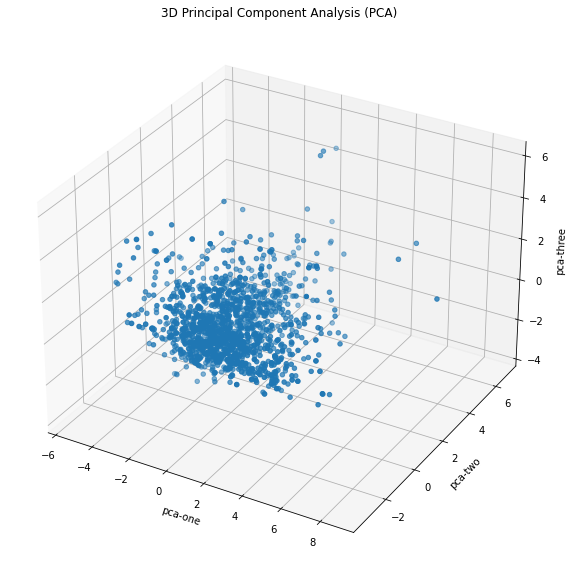

In [72]:
principal_component3 = principal_df['PC1']
principal_component4 = principal_df['PC2']
principal_component5 = principal_df['PC3']
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### PCA from sklearn

      principal component 1  principal component 2  quality
0                 -1.619530               0.450950        5
1                 -0.799170               1.856553        5
2                 -0.748479               0.882039        5
3                  2.357673              -0.269976        6
4                 -1.619530               0.450950        5
...                     ...                    ...      ...
1594              -2.150500               0.814286        5
1595              -2.214496               0.893101        6
1596              -1.456129               0.311746        6
1597              -2.270518               0.979791        5
1598              -0.426975              -0.536690        6

[1599 rows x 3 columns]


<Figure size 432x288 with 0 Axes>

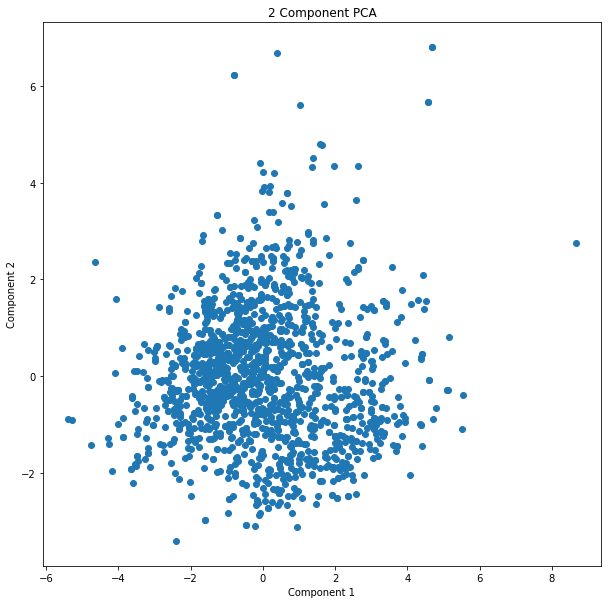

In [158]:
from sklearn.decomposition import PCA

df = pd.read_csv("C:/Users/Drishya/Downloads/winequality-red.csv",sep=';')

X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit(X).transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df['quality']], axis = 1)
print(finalDf)

principal_component1 = finalDf['principal component 1']
principal_component2 = finalDf['principal component 2']


plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'])

      principal component 1  principal component 2  principal component 3  \
0                 -1.619530               0.450950              -1.774454   
1                 -0.799170               1.856553              -0.911690   
2                 -0.748479               0.882039              -1.171394   
3                  2.357673              -0.269976               0.243489   
4                 -1.619530               0.450950              -1.774454   
...                     ...                    ...                    ...   
1594              -2.150500               0.814286               0.617063   
1595              -2.214496               0.893101               1.807402   
1596              -1.456129               0.311746               1.124239   
1597              -2.270518               0.979791               0.627965   
1598              -0.426975              -0.536690               1.628955   

      quality  
0           5  
1           5  
2           5  
3          

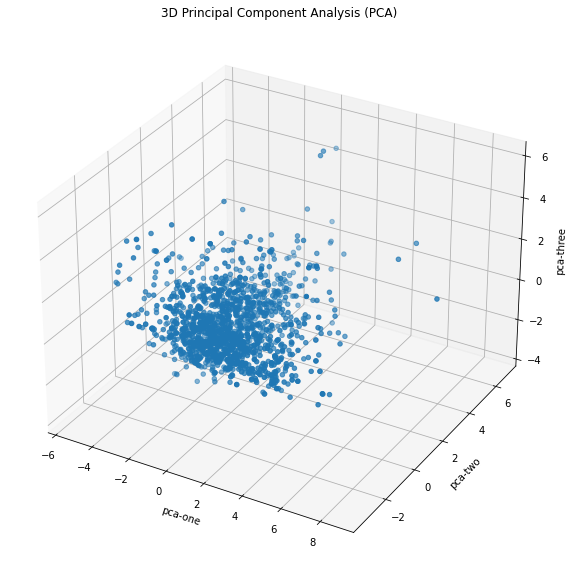

In [159]:
from sklearn.decomposition import PCA

df = pd.read_csv("C:/Users/Drishya/Downloads/winequality-red.csv",sep=';')

X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components=3)
principalComponents = pca.fit(X).transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df['quality']], axis = 1)
print(finalDf)

principal_component3 = finalDf['principal component 1']
principal_component4 = finalDf['principal component 2']
principal_component5 = finalDf['principal component 3']


ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### white wine dataset

In [82]:
df1 = pd.read_csv("C:/Users/Drishya/Downloads/winequality-white.csv",sep = ';')

In [83]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [118]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [119]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:,-1].values

In [120]:
y

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [122]:
X_std

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [123]:
X_covariance_matrix = np.cov(X_std.T)

In [124]:
X_covariance_matrix

array([[ 1.00020421e+00, -2.27019251e-02,  2.89239750e-01,
         8.90388800e-02,  2.30903579e-02, -4.94059460e-02,
         9.10883532e-02,  2.65385196e-01, -4.25945254e-01,
        -1.71464857e-02, -1.20905808e-01],
       [-2.27019251e-02,  1.00020421e+00, -1.49502334e-01,
         6.42991877e-02,  7.05259704e-02, -9.70317498e-02,
         8.92787311e-02,  2.71193823e-02, -3.19218856e-02,
        -3.57354428e-02,  6.77317712e-02],
       [ 2.89239750e-01, -1.49502334e-01,  1.00020421e+00,
         9.42308629e-02,  1.14387802e-01,  9.40964322e-02,
         1.21155533e-01,  1.49533100e-01, -1.63781650e-01,
         6.23436687e-02, -7.57441944e-02],
       [ 8.90388800e-02,  6.42991877e-02,  9.42308629e-02,
         1.00020421e+00,  8.87026459e-02,  2.99159432e-01,
         4.01521288e-01,  8.39137777e-01, -1.94173097e-01,
        -2.66698109e-02, -4.50723244e-01],
       [ 2.30903579e-02,  7.05259704e-02,  1.14387802e-01,
         8.87026459e-02,  1.00020421e+00,  1.01413057e-01,
  

In [125]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.15721845 -0.17129048  0.58755821  0.1317053  -0.33052283  0.1213683
  -0.58835527  0.19784897 -0.10353073  0.25104839 -0.01858383]
 [ 0.00508949 -0.01705666 -0.05172805  0.22372176  0.14590968 -0.5909715
  -0.02837266 -0.26935495  0.1223385   0.64261658 -0.27411517]
 [ 0.14404984 -0.00972112  0.34529456  0.03735137  0.20201133  0.50439688
   0.15228698 -0.70548123  0.13209669  0.0539051  -0.14851432]
 [ 0.42740837 -0.49022593 -0.00874939 -0.09446795 -0.40896853 -0.21431987
   0.38818585 -0.21275955 -0.28944693  0.01139144  0.27376531]
 [ 0.21201106 -0.02539945  0.00880031 -0.05337405 -0.39353539 -0.10236744
   0.10015094  0.07948377  0.39582111 -0.32862831 -0.71071228]
 [ 0.30033439  0.03090844 -0.29035514  0.56745057 -0.14407339  0.27941005
   0.08179901  0.16677879  0.49449355  0.17691226  0.30558549]
 [ 0.4066522  -0.03556095 -0.24403239 -0.70912033  0.15454024  0.12437527
  -0.24731437  0.06772962  0.27631988  0.29300991  0.06045562]
 [ 0.5115236   0.75977937 -0.

In [126]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.222911896327595
1.5755616055612756
1.221920813274389
1.0187303437157487
0.973533341065926
0.9389332086986247
0.7267463991023964
0.5994808726345701
0.41422823663926217
0.28954625377013593
0.020653302438582544


In [127]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [29.293217187564935, 14.3203630098251, 11.106103089581431, 9.25929413336802, 8.848496178773972, 8.534013740296905, 6.60543657226407, 5.448713451300141, 3.7649424158700526, 2.6317012597207685, 0.18771896143460917]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 29.29321719  43.6135802   54.71968329  63.97897742  72.8274736
  81.36148734  87.96692391  93.41563736  97.18057978  99.81228104
 100.        ]


In [128]:
print ("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1),
                      eig_pairs[1][1].reshape(11,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(3.222911896327595, array([ 0.15721845,  0.00508949,  0.14404984,  0.42740837,  0.21201106,
        0.30033439,  0.4066522 ,  0.5115236 , -0.12883188,  0.04337933,
       -0.43723783])), (1.5755616055612756, array([ 0.58755821, -0.05172805,  0.34529456, -0.00874939,  0.00880031,
       -0.29035514, -0.24403239, -0.0062968 , -0.5813444 , -0.22269537,
        0.03556867])), (1.221920813274389, array([ 0.1213683 , -0.5909715 ,  0.50439688, -0.21431987, -0.10236744,
        0.27941005,  0.12437527, -0.12920286,  0.1266715 ,  0.43324404,
        0.10590316])), (1.0187303437157487, array([-0.01858383, -0.27411517, -0.14851432,  0.27376531, -0.71071228,
        0.30558549,  0.06045562,  0.0220611 , -0.09775335, -0.44205953,
        0.1410787 ])), (0.973533341065926, array([ 0.25104839,  0.64261658,  0.0539051 ,  0.01139144, -0.32862831,
        0.17691226,  0.29300991, -0.08458824, -0.11982553,  0.40058526,
        0.33741948])), (0.9389332086986247,

In [129]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[ 3.67694351  0.54523329]
 [-0.64458784 -0.43076995]
 [ 0.15529055  1.18979993]
 [ 1.45537409 -0.09968018]
 [ 1.45537409 -0.09968018]]


In [130]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(Y , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, df[['quality']]], axis = 1)
principal_df = principal_df.rename(columns = {'quality': 'y'}, inplace = False)

print(principal_df)

           PC1       PC2    y
0     3.676944  0.545233  5.0
1    -0.644588 -0.430770  5.0
2     0.155291  1.189800  5.0
3     1.455374 -0.099680  6.0
4     1.455374 -0.099680  5.0
...        ...       ...  ...
4893 -2.094367 -0.390789  NaN
4894  1.295014 -0.490753  NaN
4895 -0.779731  0.408480  NaN
4896 -3.407302 -0.915744  NaN
4897 -2.823212  0.130939  NaN

[4898 rows x 3 columns]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

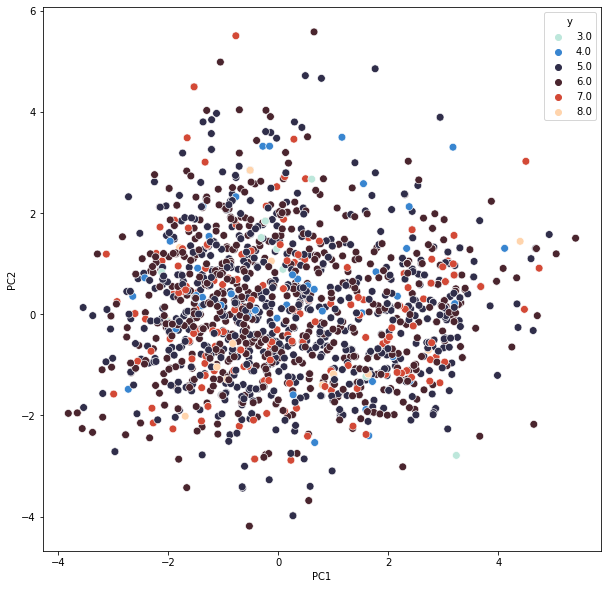

In [131]:
import seaborn as sb
import matplotlib.pyplot as plt
target = df['quality'] 
plt.figure(figsize = (10,10))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'y' , s = 60 , palette= 'icefire')

### 3D plots

In [132]:
print ("All Eigen Values along with Eigen Vectors")
print(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(11,1),
                      eig_pairs[1][1].reshape(11,1),
                      eig_pairs[2][1].reshape(11,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(3.222911896327595, array([ 0.15721845,  0.00508949,  0.14404984,  0.42740837,  0.21201106,
        0.30033439,  0.4066522 ,  0.5115236 , -0.12883188,  0.04337933,
       -0.43723783])), (1.5755616055612756, array([ 0.58755821, -0.05172805,  0.34529456, -0.00874939,  0.00880031,
       -0.29035514, -0.24403239, -0.0062968 , -0.5813444 , -0.22269537,
        0.03556867])), (1.221920813274389, array([ 0.1213683 , -0.5909715 ,  0.50439688, -0.21431987, -0.10236744,
        0.27941005,  0.12437527, -0.12920286,  0.1266715 ,  0.43324404,
        0.10590316])), (1.0187303437157487, array([-0.01858383, -0.27411517, -0.14851432,  0.27376531, -0.71071228,
        0.30558549,  0.06045562,  0.0220611 , -0.09775335, -0.44205953,
        0.1410787 ])), (0.973533341065926, array([ 0.25104839,  0.64261658,  0.0539051 ,  0.01139144, -0.32862831,
        0.17691226,  0.29300991, -0.08458824, -0.11982553,  0.40058526,
        0.33741948])), (0.9389332086986247,

In [133]:
Y = X_std.dot(matrix_w)
print(Y[0:5])

[[ 3.67694351e+00  5.45233291e-01 -9.30421883e-01]
 [-6.44587836e-01 -4.30769948e-01 -3.56330699e-01]
 [ 1.55290548e-01  1.18979993e+00 -1.75315225e-02]
 [ 1.45537409e+00 -9.96801785e-02 -1.95638546e-03]
 [ 1.45537409e+00 -9.96801785e-02 -1.95638546e-03]]


In [134]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(Y , columns = ['PC1','PC2','PC3'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, df[['quality']]], axis = 1)
principal_df = principal_df.rename(columns = {'quality': 'y'}, inplace = False)

print(principal_df)

           PC1       PC2       PC3    y
0     3.676944  0.545233 -0.930422  5.0
1    -0.644588 -0.430770 -0.356331  5.0
2     0.155291  1.189800 -0.017532  5.0
3     1.455374 -0.099680 -0.001956  6.0
4     1.455374 -0.099680 -0.001956  5.0
...        ...       ...       ...  ...
4893 -2.094367 -0.390789  0.325364  NaN
4894  1.295014 -0.490753 -0.066307  NaN
4895 -0.779731  0.408480 -0.664677  NaN
4896 -3.407302 -0.915744 -0.268297  NaN
4897 -2.823212  0.130939  0.213890  NaN

[4898 rows x 4 columns]


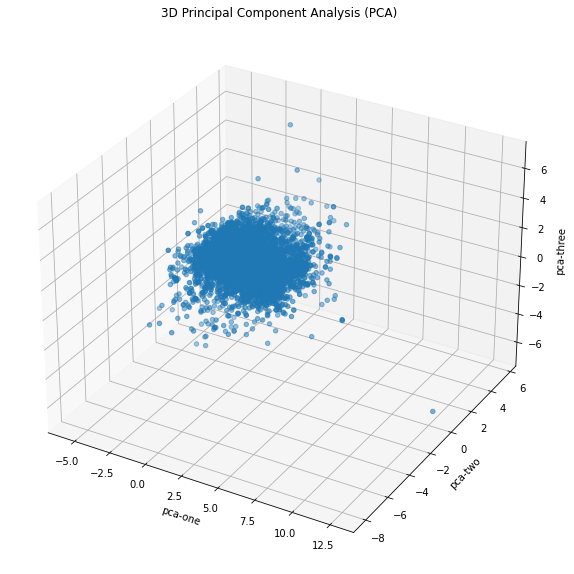

In [135]:
principal_component3 = principal_df['PC1']
principal_component4 = principal_df['PC2']
principal_component5 = principal_df['PC3']
ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### PCA from sklearn

In [142]:
from sklearn.decomposition import PCA
df1 = pd.read_csv("C:/Users/Drishya/Downloads/winequality-white.csv")

X = df1.iloc[:, :-1].values
y = df1.iloc[:,-1].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [143]:
y

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

In [148]:
pca = PCA(n_components=2)
principalComponents = pca.fit(X).transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [149]:
finalDf = pd.concat([principalDf, df1['quality']], axis = 1)
print(finalDf)
principal_component1 = finalDf['principal component 1']
principal_component2 = finalDf['principal component 2']

      principal component 1  principal component 2  quality
0                  3.676944              -0.545233        6
1                 -0.644588               0.430770        6
2                  0.155291              -1.189800        6
3                  1.455374               0.099680        6
4                  1.455374               0.099680        6
...                     ...                    ...      ...
4893              -2.094367               0.390789        6
4894               1.295014               0.490753        5
4895              -0.779731              -0.408480        6
4896              -3.407302               0.915744        7
4897              -2.823212              -0.130939        6

[4898 rows x 3 columns]


<Figure size 432x288 with 0 Axes>

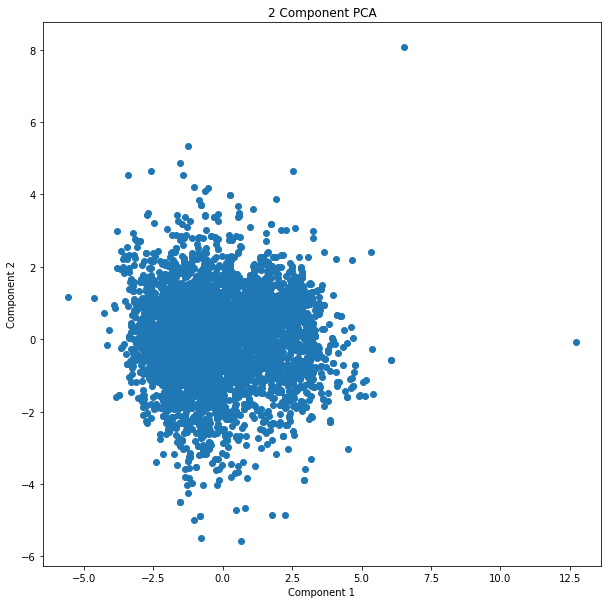

In [150]:

# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'])

      principal component 1  principal component 2  principal component 3  \
0                  3.676944              -0.545233              -0.930422   
1                 -0.644588               0.430770              -0.356331   
2                  0.155291              -1.189800              -0.017532   
3                  1.455374               0.099680              -0.001956   
4                  1.455374               0.099680              -0.001956   
...                     ...                    ...                    ...   
4893              -2.094367               0.390789               0.325364   
4894               1.295014               0.490753              -0.066307   
4895              -0.779731              -0.408480              -0.664677   
4896              -3.407302               0.915744              -0.268297   
4897              -2.823212              -0.130939               0.213890   

      quality  
0           6  
1           6  
2           6  
3          

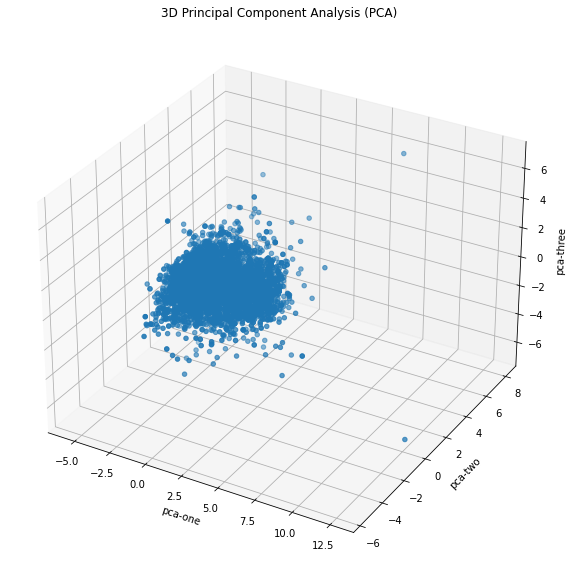

In [160]:
from sklearn.decomposition import PCA

df1 = pd.read_csv("C:/Users/Drishya/Downloads/winequality-white.csv")

X = df1.iloc[:, :-1].values
y = df1.iloc[:,-1].values

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components=3)
principalComponents = pca.fit(X).transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df1['quality']], axis = 1)
print(finalDf)

principal_component3 = finalDf['principal component 1']
principal_component4 = finalDf['principal component 2']
principal_component5 = finalDf['principal component 3']


ax = plt.figure(figsize=(10,10)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component3, 
    ys=principal_component4, 
    zs=principal_component5, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()